In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../artifacts/sentiment_analysis.csv'

In [5]:
data = pd.read_csv("C:/Users/Download/Desktop/vs/Sentimental Analysis/sentiment_analysis_project/artifacts/sentiment_analysis.csv")


In [6]:

data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## Data preprocessing

In [7]:
data.shape

(7920, 3)

In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### text preprocessing (uppercase to lower,remove links/num/stopwords/punctuations,stemmimg)

In [11]:
import re
import string

In [12]:

data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

In [13]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [14]:

data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

remove links

In [15]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [16]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

remove punctuations

In [17]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [19]:

data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

remove num

In [20]:
data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\DOWNLOAD\AppData\Local\Temp\ipykernel_15752\425538495.py:1: SyntaxWarning: invalid escape sequence '\d'
  data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)


In [21]:
data["tweet"] = data["tweet"].str.replace(r'\d+', '', regex=True)


In [22]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

remove stopwords

In [30]:
!pip install nltk



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import nltk

In [116]:
nltk.download('stopwords', download_dir='static/model')

[nltk_data] Downloading package stopwords to static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [32]:
import nltk
print(nltk.data.path)

['C:\\Users\\DOWNLOAD/nltk_data', 'C:\\Users\\DOWNLOAD\\Desktop\\vs\\Sentimental Analysis\\sentiment_analysis_project\\env\\nltk_data', 'C:\\Users\\DOWNLOAD\\Desktop\\vs\\Sentimental Analysis\\sentiment_analysis_project\\env\\share\\nltk_data', 'C:\\Users\\DOWNLOAD\\Desktop\\vs\\Sentimental Analysis\\sentiment_analysis_project\\env\\lib\\nltk_data', 'C:\\Users\\DOWNLOAD\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data', '../static/model']


In [33]:
import os
import nltk

# Get absolute path to your desired directory
download_dir = os.path.abspath('../static/model')
nltk.download('stopwords', download_dir=download_dir)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DOWNLOAD\Desktop\vs\Sentimental
[nltk_data]     Analysis\static\model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [117]:
import nltk
import shutil
import os

# Download to default location first
nltk.download('stopwords')

# Then move to your desired location
src = os.path.join(nltk.data.path[0], 'corpora/stopwords')
dst = 'static/model/stopwords'
shutil.move(src, dst)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DOWNLOAD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


FileNotFoundError: [WinError 3] The system cannot find the path specified

In [35]:
nltk.download('stopwords', download_dir='../static/model', force=True)

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [ ]:
with open('static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [ ]:
sw

In [38]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [39]:

data["tweet"].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

stemming

In [40]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [41]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [42]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [44]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


### building vocabulary

In [118]:

from collections import Counter
vocab = Counter()

In [119]:
vocab

Counter()

In [120]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [121]:
len(vocab)

15949

In [49]:
data.shape

(7920, 3)

In [122]:
tokens = [key for key in vocab if vocab[key] > 10]

In [123]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [52]:
len(tokens)

1145

In [124]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, 'static/model/vocabulary.txt')

### devide dataset

In [54]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


In [55]:
X = data['tweet']
y = data['label']

In [56]:
!pip install scikit-learn

  Using cached scikit_learn-1.7.1-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.16.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.1-cp313-cp313-win_amd64.whl (8.7 MB)
Using cached scipy-1.16.1-cp313-cp313-win_amd64.whl (38.5 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- ------------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [58]:

X_train

7115    sunday squareadi sunday relax home iphon insta...
1504    selfi posese feel happyit import samsung dubai...
3401    don’t forget smile music smile likeforfollow l...
1526    spend day put music onto itun ipod new laptop ...
2124    advertis archiv samsung blast text less tap x pda
                              ...                        
6595    would like wish amaz day make everi minut coun...
6901    work much w mac work mess window keyboard shor...
7294    meselfi ff ipad cameramanboy instamood instafa...
2323    time im technolog incap get use appl product n...
5097    jacielynnclark make phone sell em like cant ma...
Name: tweet, Length: 6336, dtype: object

## vectorization

In [59]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [60]:
vectorized_x_train = vectorizer(X_train, tokens)

In [65]:

vectorized_x_test = vectorizer(X_test, tokens)

In [62]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6336, 1145), dtype=float32)

In [63]:
y_train

7115    0
1504    0
3401    0
1526    1
2124    1
       ..
6595    0
6901    1
7294    0
2323    1
5097    1
Name: label, Length: 6336, dtype: int64

In [66]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1145), dtype=float32)

In [67]:
y_train.value_counts()

label
0    4711
1    1625
Name: count, dtype: int64

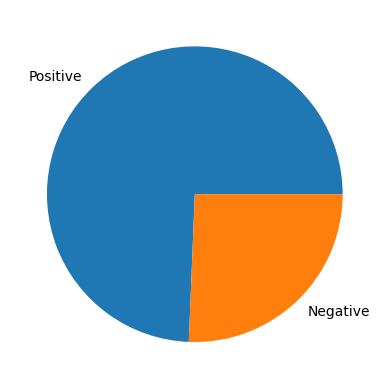

In [68]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

### handle imblanced dataset

In [73]:
!python -m pip install --upgrade pip

  Using cached pip-25.2-py3-none-any.whl.metadata (4.7 kB)
Using cached pip-25.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 25.1.1
    Uninstalling pip-25.1.1:
      Successfully uninstalled pip-25.1.1


In [85]:
!pip install imbalanced-learn

In [87]:
!pip install --upgrade scipy


In [89]:
import scipy
print(scipy.__version__)


1.16.1


In [92]:
!pip install --upgrade scikit-learn


  Using cached scikit_learn-1.7.1-cp313-cp313-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.7.1-cp313-cp313-win_amd64.whl (8.7 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.1 which is incompatible.


In [94]:
!pip uninstall -y sklearn-compat


Found existing installation: sklearn-compat 0.1.3
Uninstalling sklearn-compat-0.1.3:
  Successfully uninstalled sklearn-compat-0.1.3


In [95]:
import sklearn
print(sklearn.__version__)


1.7.1


In [96]:
from imblearn.over_sampling import SMOTE

In [97]:
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9422, 1145) (9422,)


In [98]:
y_train_smote.value_counts()

label
0    4711
1    4711
Name: count, dtype: int64

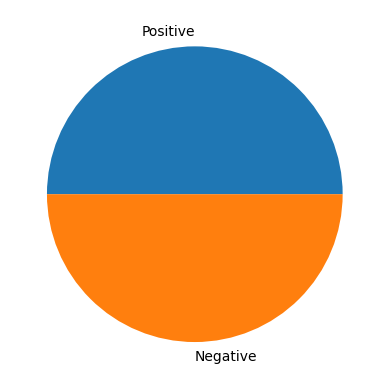

In [99]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [100]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(9422, 1145), dtype=float32)

In [101]:
y_train_smote

0       0
1       0
2       0
3       1
4       1
       ..
9417    1
9418    1
9419    1
9420    1
9421    1
Name: label, Length: 9422, dtype: int64

In [102]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1145), dtype=float32)

In [103]:
y_test

6511    1
2508    0
2974    0
3819    0
1713    0
       ..
5799    0
3922    0
403     1
2564    0
2182    0
Name: label, Length: 1584, dtype: int64

### Model Training and Evaluation

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [105]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

### Logistic Regression

In [106]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.938
	Precision = 0.916
	Recall = 0.965
	F1-Score = 0.94
Testing Scores:
	Accuracy = 0.876
	Precision = 0.716
	Recall = 0.843
	F1-Score = 0.774


### Naive Bayes

In [108]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.905
	Precision = 0.868
	Recall = 0.954
	F1-Score = 0.909
Testing Scores:
	Accuracy = 0.863
	Precision = 0.669
	Recall = 0.908
	F1-Score = 0.77


### Decision Tree

In [109]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.847
	Precision = 0.703
	Recall = 0.683
	F1-Score = 0.693


### Random Forest

In [110]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.878
	Precision = 0.777
	Recall = 0.728
	F1-Score = 0.752


### Support Vector Machine

In [111]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.981
	Precision = 0.966
	Recall = 0.997
	F1-Score = 0.981
Testing Scores:
	Accuracy = 0.891
	Precision = 0.76
	Recall = 0.83
	F1-Score = 0.794


In [115]:
import pickle

with open('static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)

In [114]:
import os
print(os.getcwd())


C:\Users\DOWNLOAD\Desktop\vs\Sentimental Analysis\sentiment_analysis_project
